In [1]:
import xarray as xr
%matplotlib inline

In [3]:
# the data can be found at http://glasslab.engr.ccny.cuny.edu/u/hannah/eas213/landsat_hires.nc
# ds = xr.open_dataset("../data/landsat_hires.nc")

In [ ]:
# quilt is an alternative way of accessing the data
# need to first install quilt: pip install quilt
# then install data: quilt install story645/eas213
from quilt.data.story645.eas213 import landsat_hires
ds = xr.open_dataset(landsat_hires._data())

In [4]:
ds

<xarray.Dataset>
Dimensions:            (time: 21, x: 921, y: 815)
Coordinates:
    lat                (time, y, x) float64 40.88 40.88 40.88 40.88 40.88 ...
    lon                (time, y, x) float64 -74.07 -74.07 -74.07 -74.06 ...
  * time               (time) datetime64[ns] 2014-04-10 2014-04-26 ...
Dimensions without coordinates: x, y
Data variables:
    Blue               (time, y, x) float64 0.0991 0.0868 0.0807 0.0784 ...
    Thermal Radiances  (time, y, x) float64 8.023 7.835 7.669 7.523 7.41 ...
    UV                 (time, y, x) float64 0.1126 0.1031 0.0981 0.0957 ...
    Green              (time, y, x) float64 0.0774 0.0633 0.0564 0.0533 ...
    NIR                (time, y, x) float64 0.0529 0.0 0.0 0.0 0.0 0.0 0.0 ...
    Red                (time, y, x) float64 0.0694 0.0424 0.0278 0.0234 ...
Attributes:
    _NCProperties:  version=1|netcdflibversion=4.6.1|hdf5libversion=1.10.2

In [ ]:
subset = ds.sel(time='2014-04-10')
subset

In [ ]:
_ = subset['Red'].plot(cmap='Reds')

In [ ]:
_ = subset['Green'].plot(cmap='Greens')

In [ ]:
_ = subset['Blue'].plot(cmap='Blues')

# Try the other channels!

In [ ]:
# colormap reference https://matplotlib.org/examples/color/colormaps_reference.html
_ = subset['UV'].plot(cmap='inferno')

In [ ]:
_ = subset['Red'].plot.hist(bins=180, color='r', histtype='step')
_ = subset['Blue'].plot.hist(bins=180, color='b', histtype='step')
_ = subset['Green'].plot.hist(bins=180, color='g', histtype='step')
# add other channels here

# Can we get averages?

In [5]:
ds['Thermal Radiances']

<xarray.DataArray 'Thermal Radiances' (time: 21, y: 815, x: 921)>
[15762915 values with dtype=float64]
Coordinates:
    lat      (time, y, x) float64 40.88 40.88 40.88 40.88 40.88 40.88 40.88 ...
    lon      (time, y, x) float64 -74.07 -74.07 -74.07 -74.06 -74.06 -74.06 ...
  * time     (time) datetime64[ns] 2014-04-10 2014-04-26 2014-06-29 ...
Dimensions without coordinates: y, x

In [ ]:
_= ds['Thermal Radiances'].mean('time').plot()

In [6]:
import landsat_sample_functions as lf

In [7]:
temps = lf.BT(ds['Thermal Radiances'], 10.9,1)
temps

<xarray.DataArray 'Thermal Radiances' (time: 21, y: 815, x: 921)>
array([[[ 288.724198,  287.251754, ...,  293.033189,  292.778576],
        [ 286.388656,  285.020242, ...,  292.995782,  292.763581],
        ..., 
        [ 294.519369,  294.63005 , ...,  278.14069 ,  278.149311],
        [ 294.438135,  294.475067, ...,  278.14069 ,  278.149311]],

       [[ 290.053955,  288.630812, ...,  295.012914,  294.976156],
        [ 288.240833,  286.864624, ...,  294.887888,  294.836367],
        ..., 
        [ 291.215763,  291.527058, ...,  279.89243 ,  279.790738],
        [ 291.382908,  291.67102 , ...,  279.909368,  279.81617 ]],

       ..., 
       [[ 279.824646,  279.127191, ...,  288.801957,  288.716419],
        [ 279.067424,  278.269926, ...,  288.77086 ,  288.731976],
        ..., 
        [ 288.467193,  288.482786, ...,  276.663936,  276.628918],
        [ 288.334557,  288.435999, ...,  276.672689,  276.620161]],

       [[ 280.618209,  280.777849, ...,  280.196886,  280.222215],
  

In [ ]:
_ = temps.mean('time').plot(cmap='coolwarm')

In [ ]:
_ = temps.std('time').plot()

In [ ]:
tmean = temps.mean(['x','y'])
_ = tmean.plot(color='k')
tstd = temps.std(['x', 'y'])
_ = (tmean + tstd).plot(color='gray')
_ = (tmean-tstd).plot(color='gray')

# Aggregation

In [8]:
#change 'time.month' to 'time.season'
temps.groupby('time.month').mean()

<xarray.DataArray 'Thermal Radiances' (month: 11)>
array([ 270.114985,  263.674063,  280.471967,  288.263943,  288.126051,
        301.976739,  297.956464,  294.896785,  295.231444,  291.256392,
        278.417273])
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11

In [9]:
months = dict(temps.groupby('time.month'))

In [10]:
months[1]

<xarray.DataArray 'Thermal Radiances' (time: 2, y: 815, x: 921)>
array([[[ 270.001625,  270.591756, ...,  265.600659,  265.561155],
        [ 271.029544,  271.585405, ...,  265.501865,  265.472205],
        ..., 
        [ 265.945561,  265.945561, ...,  273.097032,  273.097032],
        [ 265.955395,  265.965229, ...,  273.133374,  273.12429 ]],

       [[ 273.938381,  273.71295 , ...,  275.492686,  275.333068],
        [ 273.848273,  273.6678  , ...,  275.492686,  275.359689],
        ..., 
        [ 274.41452 ,  274.235126, ...,  272.26639 ,  272.312223],
        [ 274.441399,  274.369703, ...,  272.248051,  272.26639 ]]])
Coordinates:
    lat      (time, y, x) float64 40.88 40.88 40.88 40.88 40.88 40.88 40.88 ...
    lon      (time, y, x) float64 -74.07 -74.07 -74.07 -74.07 -74.06 -74.06 ...
  * time     (time) datetime64[ns] 2015-01-07 2015-01-23
Dimensions without coordinates: y, x

In [ ]:
_ = months[1].mean('time').plot()

In [ ]:
_ = months[1].mean(['x', 'y']).plot(linestyle="None", marker='o')

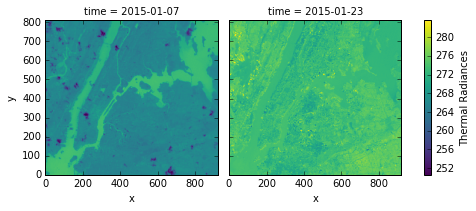

In [11]:
# http://xarray.pydata.org/en/stable/plotting.html
_ = months[1].plot(x='x', y='y', col='time')